<img src="./img/HWNI_logo.svg"/>

# Problem Set 2

In [1]:
library(ggplot2)
options(repr.plot.width  = 5,
        repr.plot.height = 4)

## Problem 1: A 2-Sample Unpaired t-Test

Octopamine has been implicated in modulating feeding behaviors in both vertebrates and invertebrates. Pargyline has been shown to increase the levels of octopamine in the nervous system. The role of pargyline in sucrose consumption was tested in blowflies. Two groups of blowfies were used in this study: one group was injected with parglyine (n=295 flies) while the control group was injected with saline (n = 300 flies). The amount of sucrose consumed was then measured. [adapted from Samuels & Witmer, pg 220. Originally: Long & Murdock, PNAS 1983]

### a) A two-sample t-test is the most appropriate test for this data set. Why?

### b) Load in the data set and visualize the two conditions as histograms. What can you say about the data? What are the means and standard deviations of the two groups?

In [2]:
flyData <- read.table("data/2_1.csv",
                    sep=",",
                    header=TRUE)


In [3]:
head(flyData)

,SucrConsump,Injection,Exp_Idx
1,21.7,Saline,1
2,17,Saline,1
3,11.1,Saline,1
4,6.3,Saline,1
5,19.3,Saline,1
6,13.3,Saline,1


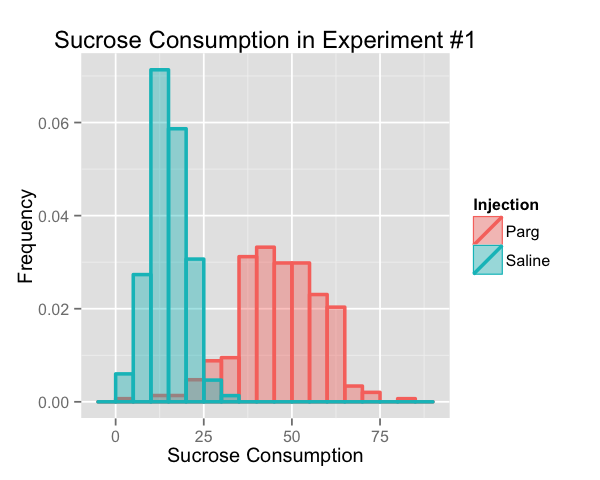

In [4]:
experimentIndex <- 1 #change me to change the experiment

# set the data we're going to use
# and which elements of the plot come from which variables
p <- ggplot(flyData[flyData$Exp_Idx == experimentIndex,]) + 
                aes(x = SucrConsump,
                    color=Injection,
                    fill=Injection,
                    #use following to get frequencies instead of counts
                   ..density.., 
                   )

# pick the "geometry", aka the kind of plot
p <- p + geom_histogram(binwidth=5, #bigger for a coarser view
                    alpha=I(0.4), #transparency so we can see behind
                    size=1, #thicker lines look nicer
                    position='identity'
                    )

#set the title  
figTitle <- paste("Sucrose Consumption in Experiment #",
                  toString(experimentIndex),
                  sep="")
#add labels
p <- p + xlab("Sucrose Consumption") +
            ylab("Frequency") +
            ggtitle(figTitle)
p #show the plot

In [5]:
firstExperiment <- subset(flyData, Exp_Idx == 2)
salineGroup <- subset(firstExperiment, Injection == "Saline")
pargGroup <- subset(firstExperiment, Injection != "Saline")

groups <- list(salineGroup,pargGroup)

# for-loop solution
for(group in groups){
            print("================")
            print(as.character(group$Injection[[1]]))
                print(
                  paste("Mean:",
                      toString(mean(group$SucrConsump))),
                      sep=" ")
    
                print(
                  paste("St Dev:",
                      toString(sd(group$SucrConsump))),
                      sep=" ")
             }

[1] "================"
[1] "Saline"
[1] "Mean: 15.293"
[1] "St Dev: 5.44024017220868"
[1] "================"
[1] "PargYomb"
[1] "Mean: 14.5384615384615"
[1] "St Dev: 7.27497979022084"


**Coding Tip**
If you didn't use a for-loop to solve this problem, compare your code and mine. You probably had to write out the same code many times, which increases the chance of making an error and makes fixing bugs harder. For loops are super useful!

By eye, sucrose consumption appears to be higher in the pargyline group than in the saline control group. Calculating the means and standard deviations backs this up - the means are roughly 3 standard deviations apart, using the (larger) standard deviation of the pargyline group.

### c) Visualize the data as box & whisker plots and bar graphs with standard deviations.

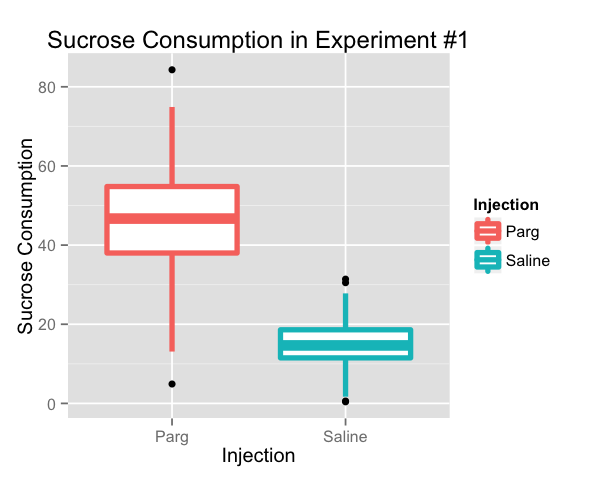

In [6]:
experimentIndex <- 1 #change me to change the experiment

# set the data we're going to use
# and which elements of the plot come from which variables
p <- ggplot(flyData[flyData$Exp_Idx == experimentIndex,]) + 
                aes(x = Injection,
                    y = SucrConsump,
                    color=Injection,
                   )

# pick the "geometry", aka the kind of plot
p <- p + geom_boxplot(
                    size=1.5, #thicker lines look nicer
                    )

#set the title  
figTitle <- paste("Sucrose Consumption in Experiment #",
                  toString(experimentIndex),
                  sep="")
#add labels
p <- p + xlab("Injection") +
            ylab("Sucrose Consumption") +
            ggtitle(figTitle)
p #show the plot

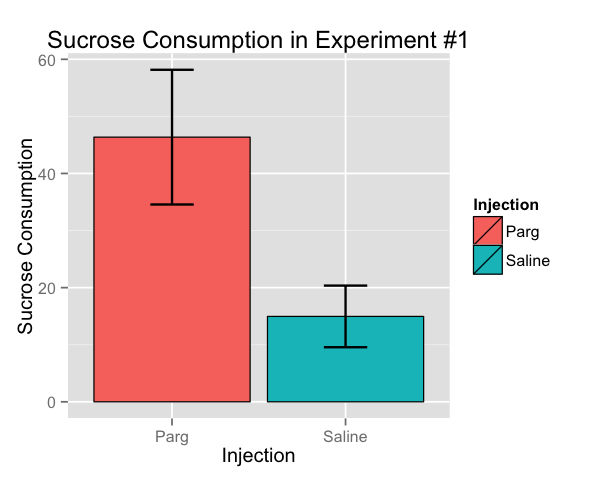

In [7]:
experimentIndex <- 1 #change me to change the experiment

rawData <- flyData[flyData$Exp_Idx == experimentIndex,]

salineGroup <- subset(rawData,Injection == "Saline")
injectGroup <- subset(rawData,Injection != "Saline")

plotData <- data.frame(Mean <- c(mean(salineGroup$SucrConsump),
                                 mean(injectGroup$SucrConsump)),
                       Injection <- c(as.character(salineGroup$Injection[1]),
                                        as.character(injectGroup$Injection[1])),
                       SD <- c(sd(salineGroup$SucrConsump),
                               sd(injectGroup$SucrConsump)
                       )
                        )

# set the data we're going to use
# and which elements of the plot come from which variables
p <- ggplot(plotData) + 
                aes(x = Injection,
                    y = Mean,
                    fill=Injection
                   )

# pick the "geometry", aka the kind of plot
p <- p + geom_bar(stat="identity",
                    size=0.35, #thinner lines look nicer
                    color="black"
                    )

p <- p + geom_errorbar(ymin=Mean-SD,ymax=Mean+SD,
                        width=0.25,
                        size=0.67)

p <- p + ylim(0,max(Mean)+max(SD))

#set the title  
figTitle <- paste("Sucrose Consumption in Experiment #",
                  toString(experimentIndex),
                  sep="")
#add labels
p <- p + xlab("Injection") +
            ylab("Sucrose Consumption") +
            ggtitle(figTitle)
p #show the plot

### d) Run a t-test to determine if the difference between the groups is statistically significant.

In [8]:
experimentIndex <- 1 #change me to change the experiment

rawData <- flyData[flyData$Exp_Idx == experimentIndex,]

salineGroup <- subset(rawData,Injection == "Saline")
injectGroup <- subset(rawData,Injection != "Saline")

t.test(salineGroup$SucrConsump,
       injectGroup$SucrConsump,
       paired=FALSE)


	Welch Two Sample t-test

data:  salineGroup$SucrConsump and injectGroup$SucrConsump
t = -41.631, df = 410.41, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -32.88621 -29.92057
sample estimates:
mean of x mean of y 
 14.96000  46.36339 


The differences are statistically significant in the first experiment but not in the second.

To further confirm octopamine positively modulates feeding behavior, an additional experiment was done with an antagonist of octopamine receptors in insects called yohimbine. One group was injected with Parglyine and yohimbine (n = 130) while an additional control group was injected with saline (n = 100). The amount of sucrose consumed was then measured.

### e) Load in the data set and visualize the two conditions as histograms, box & whisker plot, and bar graphs with SD error bars.

### f) Run a t-test to determine if the difference between the groups is statistically significant.

To view the answers for parts e and f, change the `experimentIndex` variable above from `1` to `2`.

### g) Can you think of other, or better, experiments that can be done to test the role of octopamine in feeding regulation?

Lots of answers are possible here! A paired test is one way to make a cleaner observation, as would the injection of yohimbine alone.